## **Notebook PC#05**
## Convolutional classifier for MNIST and CIFAR-10 databases.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Taylon Luan Congio Martins RA: 177379<br>
**Aluno(a):** Tiago C A Amorim RA: 100675


In [ ]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Reshape to be [samples][width][height][channels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
model.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model.to_json()
json_file = open("model_CNN_MNIST.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_CNN_MNIST.h5")
print("Model saved to disk")
os.getcwd()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 174s 91ms/step - loss: 0.1976 - accuracy: 0.9402
Epoch 2/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0829 - accuracy: 0.9760
Epoch 3/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0631 - accuracy: 0.9812
Epoch 4/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0506 - accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0456 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0379 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0344 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0306 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0276 - accurac

'/content'

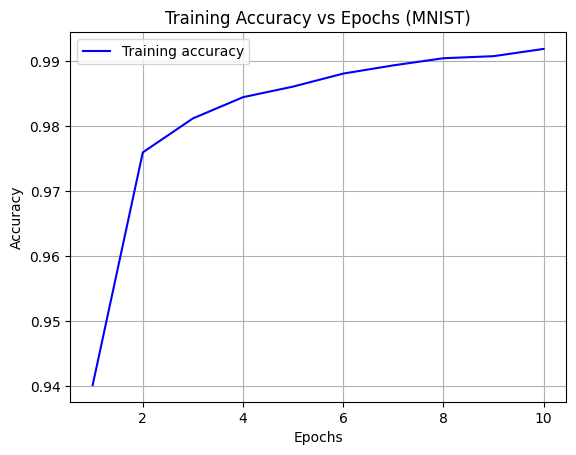

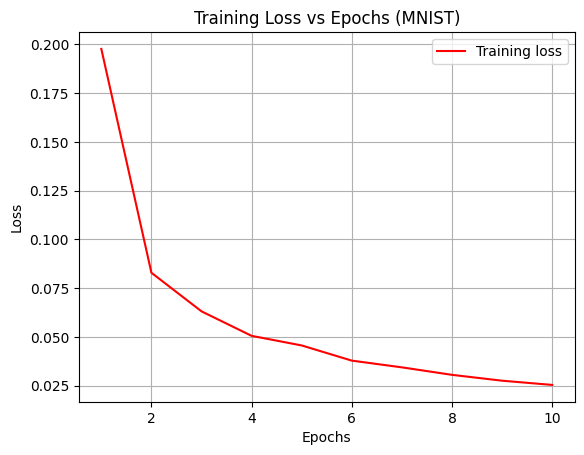

In [ ]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
import tensorflow as tf
import os

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(32, 32, 3)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=10)
model1.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model1.to_json()
json_file = open("model_CNN_CIFAR10.json", "w")
json_file.write(model_json)
json_file.close()
model1.save_weights("model_CNN_CIFAR10.h5")
print("Model saved to disk")
os.getcwd()

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 183s 117ms/step - loss: 1.5065 - accuracy: 0.4553
Epoch 2/10
1563/1563 [==============================] - 180s 115ms/step - loss: 1.1772 - accuracy: 0.5830
Epoch 3/10
1563/1563 [==============================] - 184s 118ms/step - loss: 1.0601 - accuracy: 0.6261
Epoch 4/10
1563/1563 [==============================] - 182s 117ms/step - loss: 0.9830 - accuracy: 0.6523
Epoch 5/10
1563/1563 [==============================] - 180s 115ms/step - loss: 0.9181 - accuracy: 0.6745
Epoch 6/10
1563/1563 [==============================] - 177s 113ms/step - loss: 0.8673 - accuracy: 0.6897
Epoch 7/10
1563/1563 [==============================] - 180s 115ms/step - loss: 0.8175 - accuracy: 0.7081
Epoch 8/10
1563/1563 [==============================] - 178s 114ms/step - loss: 0.7751 - accuracy: 0.7224
Epoch 9/10
1563/1563 [==============================] - 186s 119ms/step - loss: 0.734

'/content'

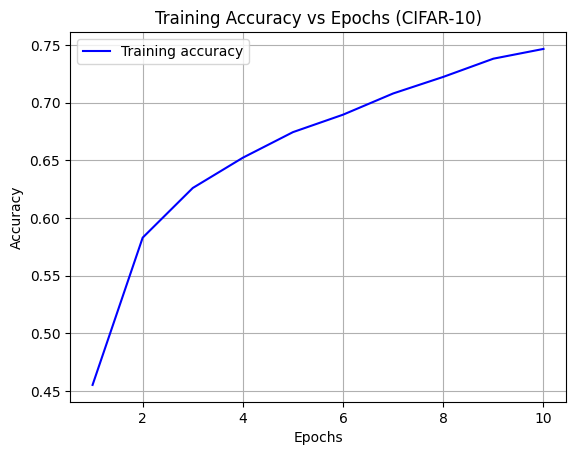

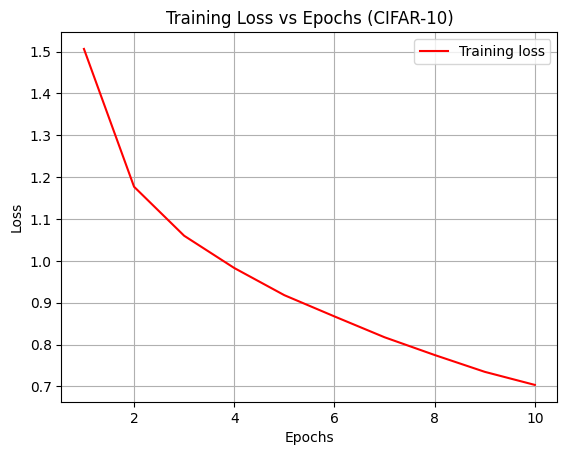

In [ ]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [1]:
# Summary of the obtained results for the MNIST database
classifier1 = 'Linear           '
classifier2 = 'ELM              '
classifier3 = 'MLP              '
classifier4 = 'CNN              '
print('--------------------------------------------------')
print('|       Accuracy for the MNIST database          |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.8617 ))
print('| %s: \t\t\t%f |'% (classifier2,0.941))
print('| %s: \t\t\t%f |'% (classifier3,0.9854999780654907))
print('| %s: \t\t\t%f |'% (classifier4,0.9919000267982483))
print('--------------------------------------------------')

--------------------------------------------------
|       Accuracy for the MNIST database          |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.861700 |
| ELM              : 			0.941000 |
| MLP              : 			0.985500 |
| CNN              : 			0.991900 |
--------------------------------------------------


In [ ]:
# Summary of the obtained results for the CIFAR10 database
classifier1 = 'Linear           '
classifier2 = 'ELM              '
classifier3 = 'MLP              '
classifier4 = 'CNN              '
print('--------------------------------------------------')
print('|      Accuracy for the CIFAR10 database         |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.4078))
print('| %s: \t\t\t%f |'% (classifier2,0.45753333333333335))
print('| %s: \t\t\t%f |'% (classifier3,0.48649999499320984))
print('| %s: \t\t\t%f |'% (classifier4,0.6909000277519226))
print('--------------------------------------------------')

--------------------------------------------------
|      Accuracy for the CIFAR10 database         |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.407800 |
| ELM              : 			0.457533 |
| MLP              : 			0.486500 |
| CNN              : 			0.690900 |
--------------------------------------------------
